The prediction task is to determine whether a person makes over $50K a year.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.shape

(32560, 15)

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<Axes: >

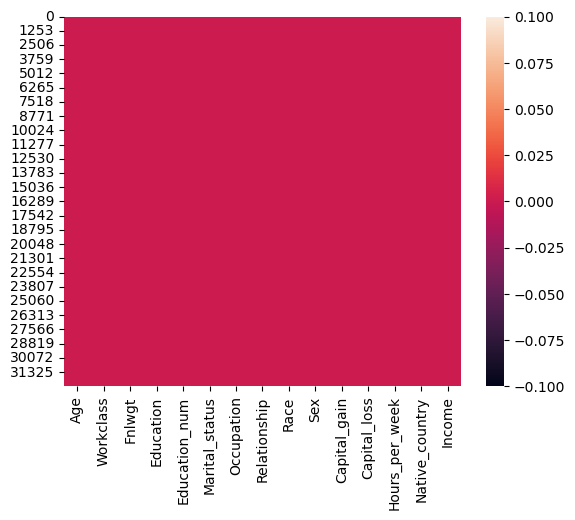

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [14]:
#Dropping Unnecessary Columns
df.drop("Fnlwgt",axis = 1, inplace = True)
df.drop("Capital_gain",axis = 1, inplace = True)
df.drop("Capital_loss",axis = 1, inplace = True)


In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       1

These are the unique values present in the dataset.

In [16]:
df.describe()

,Age,Education_num,Hours_per_week
count,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,40.437469
std,13.640642,2.572709,12.347618
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


From the statistical summary, We can observe the following

The counts of all columns are the same, there is no missing values in the dataset.
The median(50%) is less than the mean in most columns, this means that the data is skewed to the right.
There is a huge diference between 75% and max meaning there are outliers present in the dataset.
We can also notice the standard deviation,min and 25% percentile values.

Univariate Analysis

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


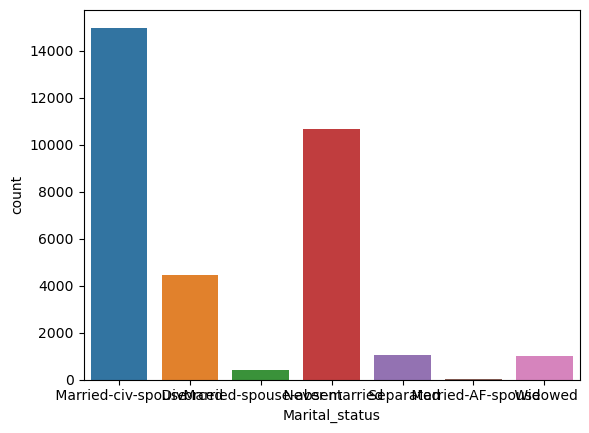

In [17]:
# Visualise the count of Marital_status
ax = sns.countplot(x="Marital_status",data = df)
print(df['Marital_status'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


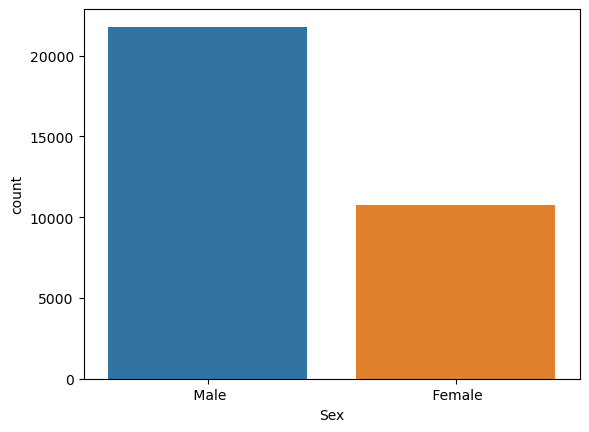

In [18]:
# Visualise the count of Sex
ax = sns.countplot(x="Sex",data = df)
print(df['Sex'].value_counts())

The count of male population is higher than female population in the dataset

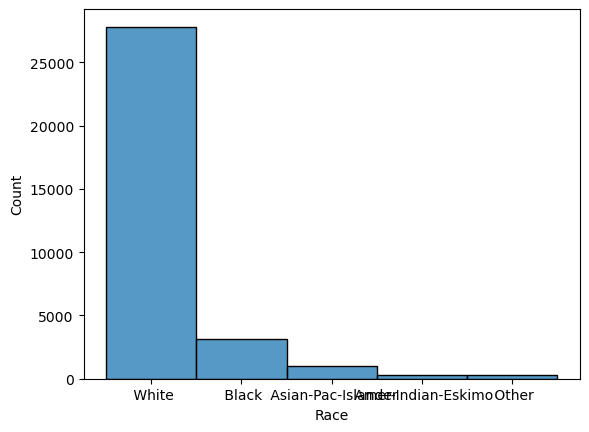

In [19]:
# Visualise the count of white
sns.histplot(df['Race'], bins=30)
plt.show()

The count of White population has the highest population

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


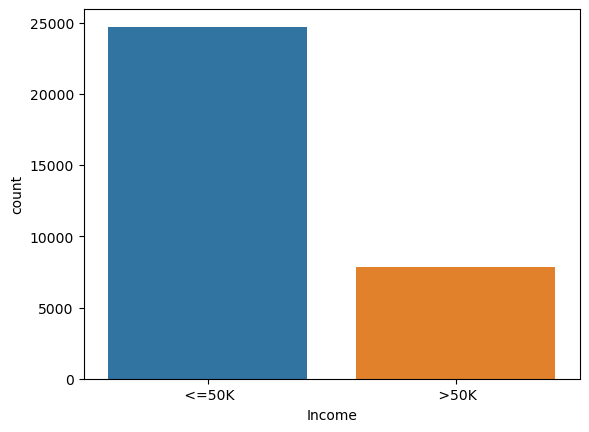

In [20]:
# Visualise the count of Income
ax = sns.countplot(x="Income",data = df)
print(df['Income'].value_counts())

We can see from the analysis that Income of <=50k is greater than that of >50k

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


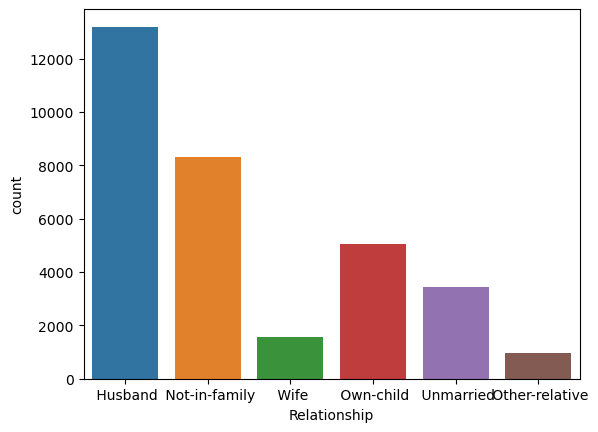

In [21]:
# Visualise the count of Relationship
ax = sns.countplot(x="Relationship",data = df)
print(df['Relationship'].value_counts())

The count of husband population has the highest population.

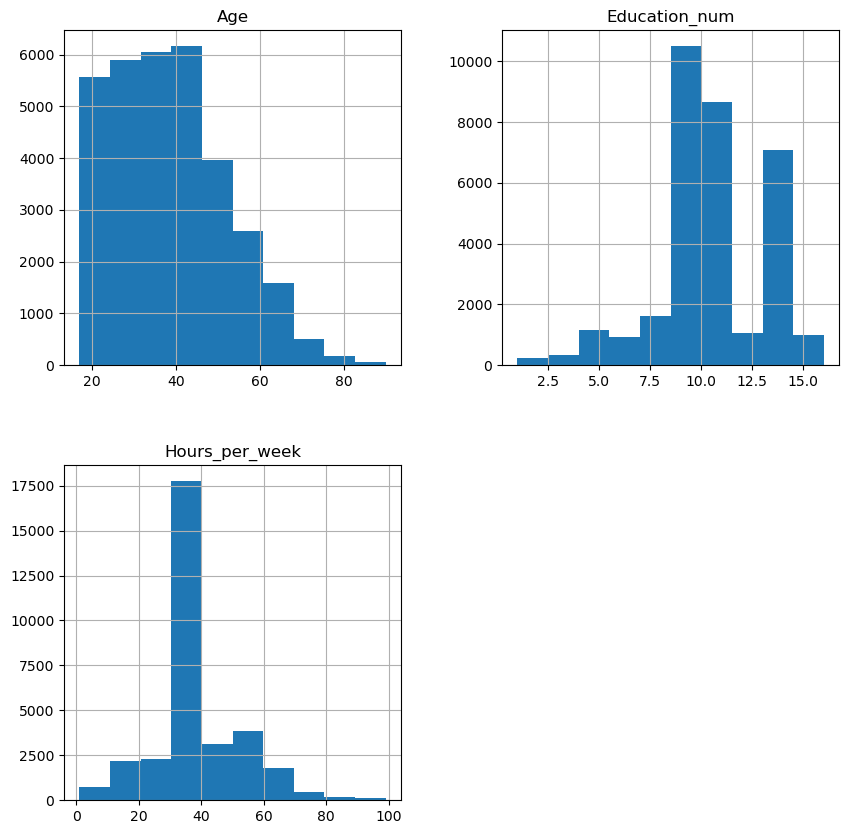

In [22]:
df.hist(bins=10,figsize=(10,10));

Bivariate Analysis

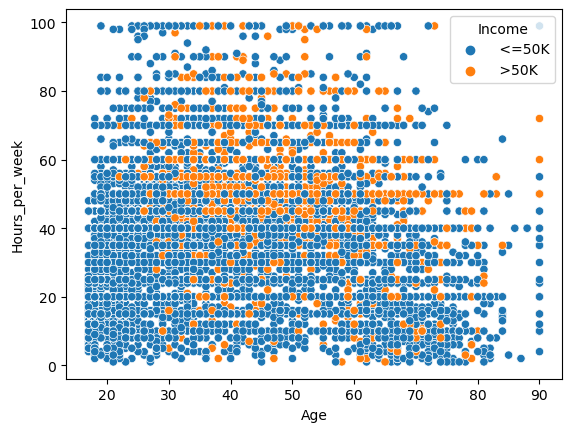

In [23]:
sns.scatterplot(x='Age', y='Hours_per_week', hue='Income', data=df)
plt.show()


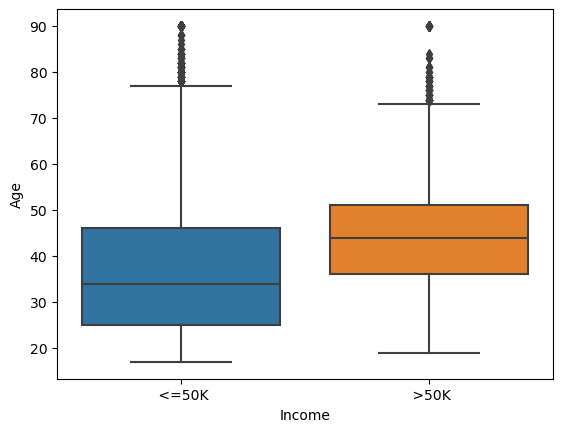

In [24]:
sns.boxplot(x='Income', y='Age', data=df)
plt.show()

Multivariate Analysis

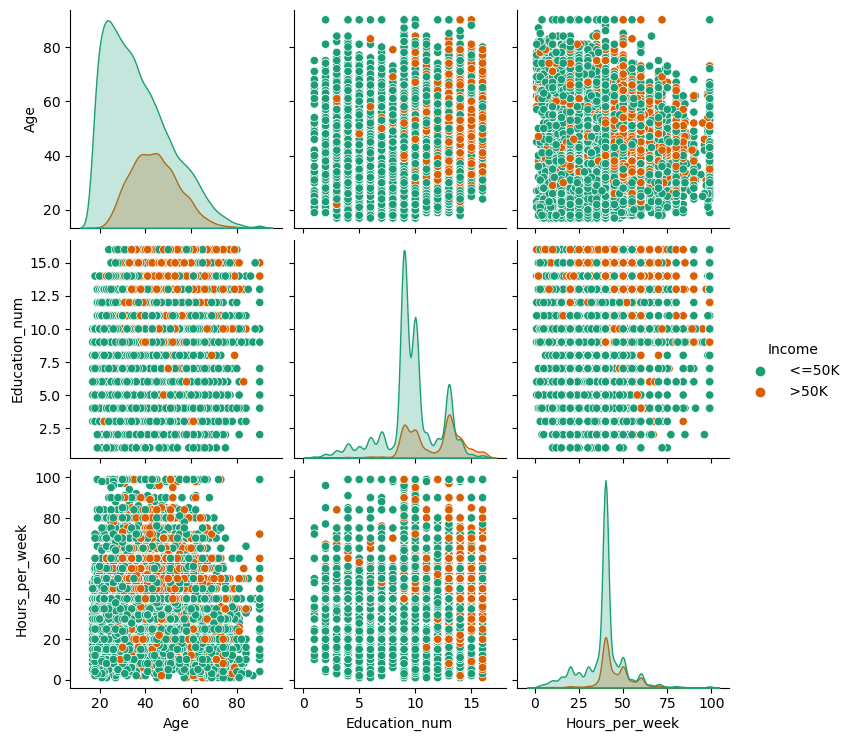

In [25]:
sns.pairplot(df, palette="Dark2", hue='Income');

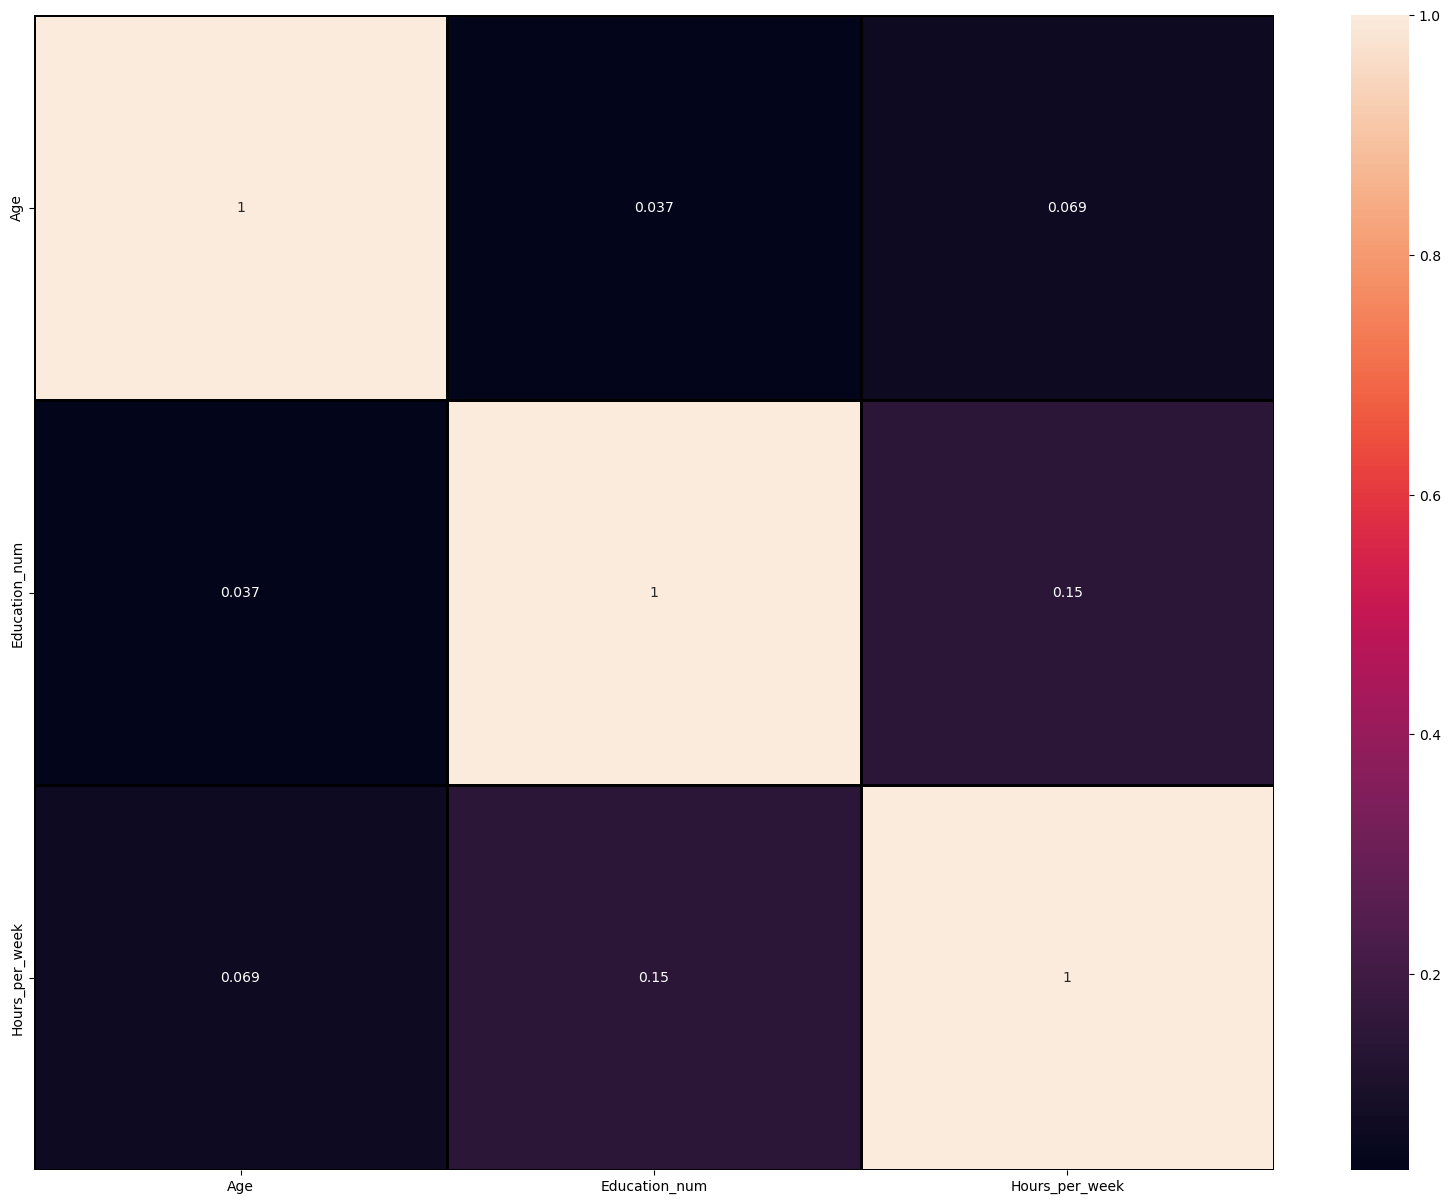

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=1, linecolor='black');

In [27]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,9.0,13,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,11.0,9,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,1.0,7,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
3,28,4.0,9.0,13,2.0,10.0,5.0,2.0,0.0,40,5.0,0.0
4,37,4.0,12.0,14,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,7.0,12,2.0,13.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,11.0,9,2.0,7.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,11.0,9,6.0,1.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,11.0,9,4.0,1.0,3.0,4.0,1.0,20,39.0,0.0


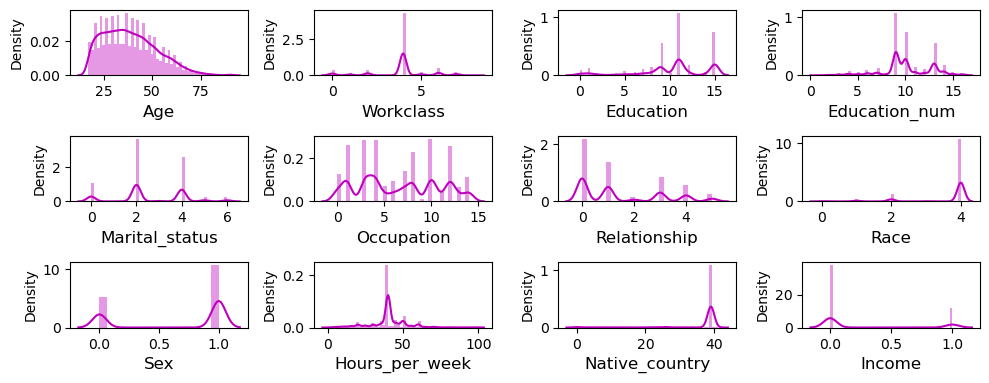

In [28]:
#To check data that have been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in df:
    if plotnumber<=15:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

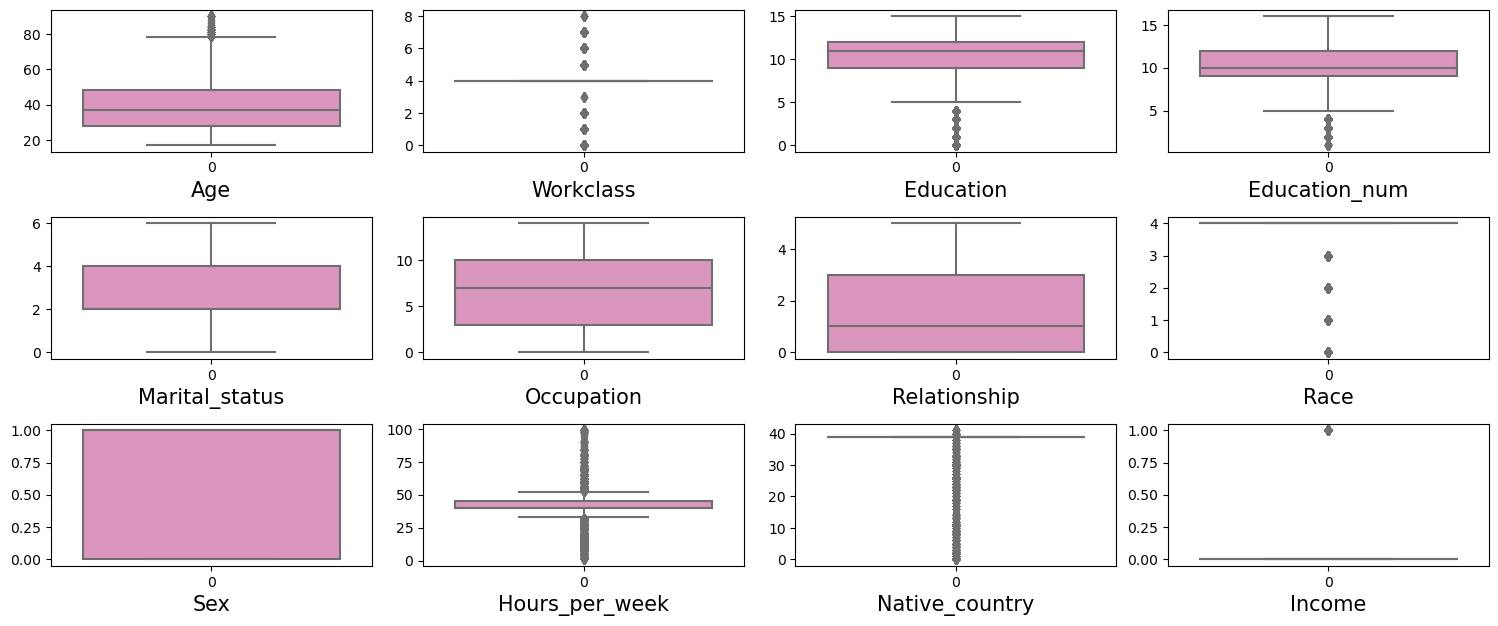

In [29]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Spme columns have outliers so we will try to remove using zscore method

In [30]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.837097,1.463883,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,2.222120,0.291573,0.563210
1,0.042640,0.090121,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.035430,0.291573,0.563210
2,1.057031,0.090121,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.035430,0.291573,0.563210
3,0.775755,0.090121,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.035430,4.054157,0.563210
4,0.115952,0.090121,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.197407,0.291573,0.563210
32556,0.103982,0.090121,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.035430,0.291573,1.775537
32557,1.423589,0.090121,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.035430,0.291573,0.563210
32558,1.215624,0.090121,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,1.655200,0.291573,0.563210


In [31]:
# Set the threshold for what constitutes an outlier
threshold = 3

# Identify rows where any value in the row exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = df[~outliers]

# Display the cleaned DataFrame
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,9.0,13,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,11.0,9,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,1.0,7,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
4,37,4.0,12.0,14,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0
5,49,4.0,6.0,5,3.0,8.0,1.0,2.0,0.0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,7.0,12,2.0,13.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,11.0,9,2.0,7.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,11.0,9,6.0,1.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,11.0,9,4.0,1.0,3.0,4.0,1.0,20,39.0,0.0


In [32]:
#checking for skewness
df.skew()


Age               0.467730
Workclass        -0.735122
Education        -0.964306
Education_num    -0.132205
Marital_status   -0.022303
Occupation        0.127211
Relationship      0.783467
Race             -2.591966
Sex              -0.712594
Hours_per_week   -0.347506
Native_country   -5.509358
Income            1.202433
dtype: float64

In [33]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.009994,0.002066,0.057308,-0.286568,-0.013557,-0.271419,0.022925,0.093403,0.096820,0.034751,0.250268
Workclass,0.009994,1.000000,0.022365,0.052687,-0.065571,0.246443,-0.090544,0.065896,0.094885,0.128008,-0.003436,0.050067
Education,0.002066,0.022365,1.000000,0.343037,-0.039357,-0.023627,-0.012376,0.027679,-0.029055,0.060967,0.083266,0.073701
Education_num,0.057308,0.052687,0.343037,1.000000,-0.064928,0.114991,-0.099369,0.087986,0.010275,0.167614,0.138056,0.340170
Marital_status,-0.286568,-0.065571,-0.039357,-0.064928,1.000000,-0.009540,0.183297,-0.086858,-0.128583,-0.200058,-0.034312,-0.197263
Occupation,-0.013557,0.246443,-0.023627,0.114991,-0.009540,1.000000,-0.078889,0.013020,0.080761,0.071280,0.010135,0.075082
Relationship,-0.271419,-0.090544,-0.012376,-0.099369,0.183297,-0.078889,1.000000,-0.147593,-0.582160,-0.267198,-0.020170,-0.253617
Race,0.022925,0.065896,0.027679,0.087986,-0.086858,0.013020,-0.147593,1.000000,0.124572,0.060992,0.057081,0.097928
Sex,0.093403,0.094885,-0.029055,0.010275,-0.128583,0.080761,-0.582160,0.124572,1.000000,0.240553,-0.004947,0.218046
Hours_per_week,0.096820,0.128008,0.060967,0.167614,-0.200058,0.071280,-0.267198,0.060992,0.240553,1.000000,0.009751,0.244996


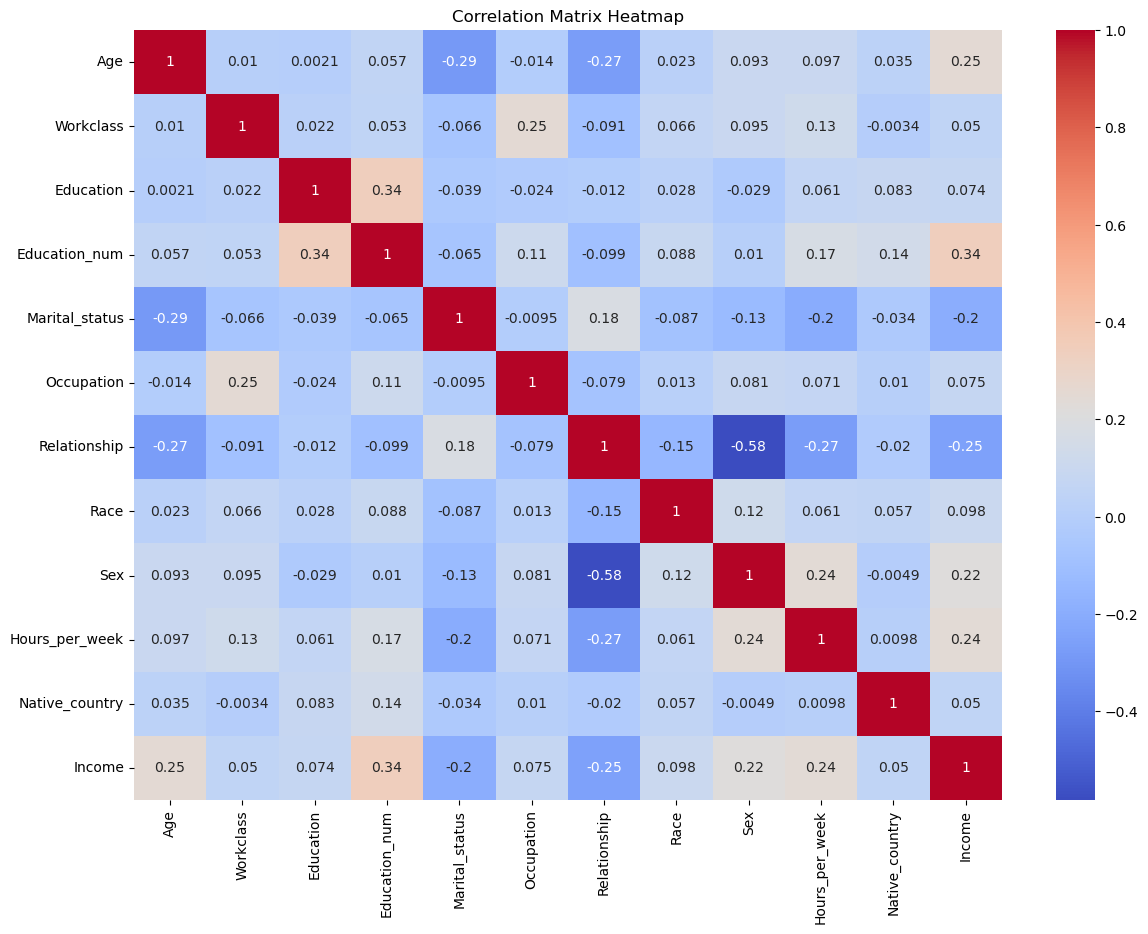

In [34]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Model Building Using machine learning algorithms to build models for predicting  whether a person’s income is above or below $50K per year.

Predicting Income (Binary Classification Problem)

In [35]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [36]:
# Split the dataset into features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8037974683544303
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      4491
         1.0       0.62      0.41      0.49      1355

    accuracy                           0.80      5846
   macro avg       0.73      0.67      0.68      5846
weighted avg       0.79      0.80      0.79      5846



In [40]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7863496407800206
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      4491
         1.0       0.54      0.56      0.55      1355

    accuracy                           0.79      5846
   macro avg       0.70      0.71      0.70      5846
weighted avg       0.79      0.79      0.79      5846



In [41]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8248374957235717
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4491
         1.0       0.63      0.59      0.61      1355

    accuracy                           0.82      5846
   macro avg       0.75      0.74      0.75      5846
weighted avg       0.82      0.82      0.82      5846



In [42]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8392062949024974
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4491
         1.0       0.68      0.57      0.62      1355

    accuracy                           0.84      5846
   macro avg       0.78      0.74      0.76      5846
weighted avg       0.83      0.84      0.83      5846



In [43]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.8246664385904893
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4491
         1.0       0.68      0.46      0.55      1355

    accuracy                           0.82      5846
   macro avg       0.77      0.70      0.72      5846
weighted avg       0.81      0.82      0.81      5846



In [44]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp_clf = MLPClassifier(max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network
Accuracy: 0.8282586383852206
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4491
         1.0       0.65      0.55      0.60      1355

    accuracy                           0.83      5846
   macro avg       0.76      0.73      0.74      5846
weighted avg       0.82      0.83      0.82      5846



The best model is Gradient Boosting because it has the highest accuracy score: 0.8392062949024974

Hyperparameter Tuning on the best model Logistic Regression

In [50]:

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best accuracy score: {grid_search.best_score_}')

# Predict with the best estimator
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score: 0.8442326654306159
Accuracy: 0.8416010947656517
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      4491
         1.0       0.68      0.61      0.64      1355

    accuracy                           0.84      5846
   macro avg       0.78      0.76      0.77      5846
weighted avg       0.84      0.84      0.84      5846

